In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

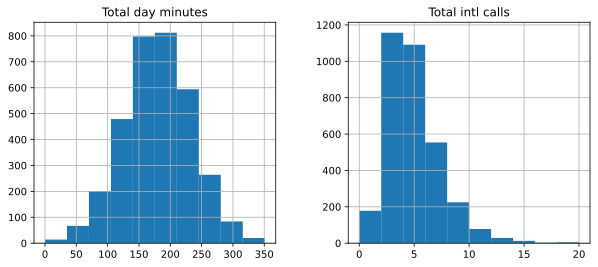

In [8]:
feats = ['Total day minutes', 'Total intl calls']
df[feats].hist(figsize=(10,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

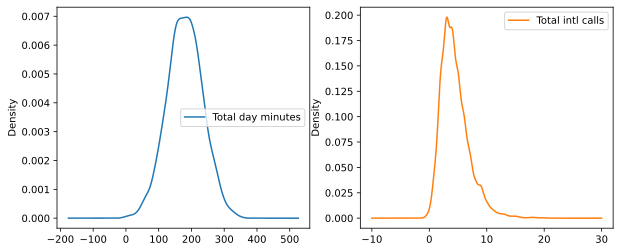

In [9]:
df[feats].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4))

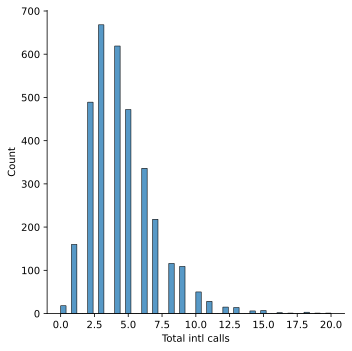

In [11]:
sns.displot(df['Total intl calls'])

<Axes: xlabel='Total intl calls'>

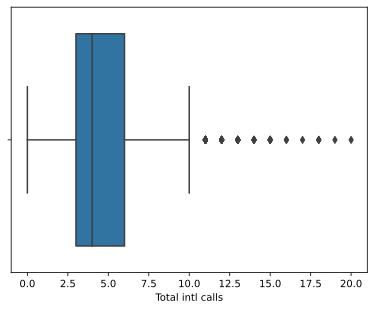

In [12]:
sns.boxplot(x='Total intl calls', data=df)

<Axes: >

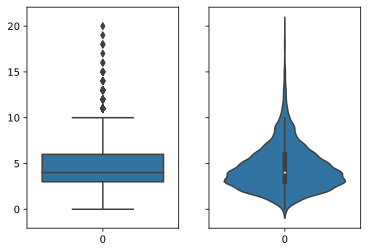

In [16]:
_, axes = plt.subplots(1,2,sharey=True,figsize=(6,4))
sns.boxplot(df['Total intl calls'], ax=axes[0])
sns.violinplot(df['Total intl calls'], ax=axes[1])

In [17]:
df[feats].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [18]:
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<Axes: xlabel='Customer service calls', ylabel='count'>

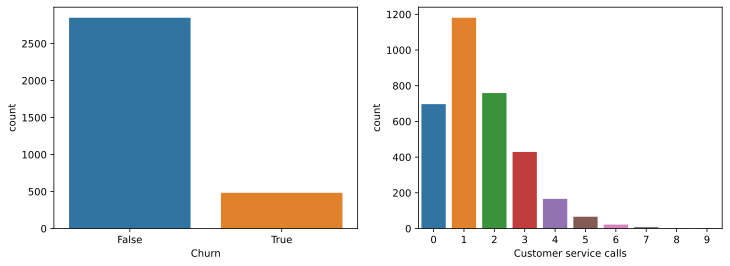

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

<Axes: >

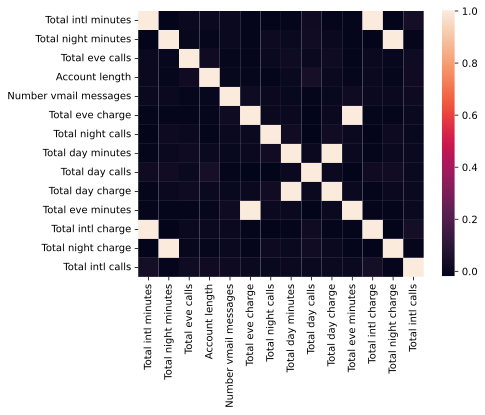

In [25]:
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: >

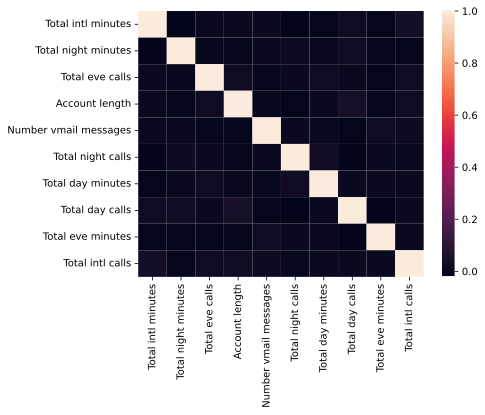

In [29]:
numerical = list(set(numerical) - set(["Total day charge","Total eve charge","Total night charge","Total intl charge",]))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

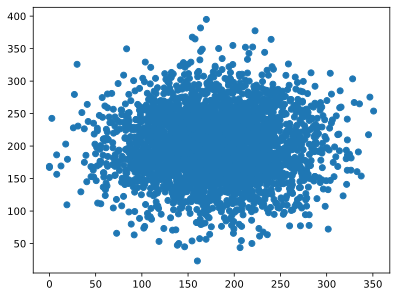

In [30]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

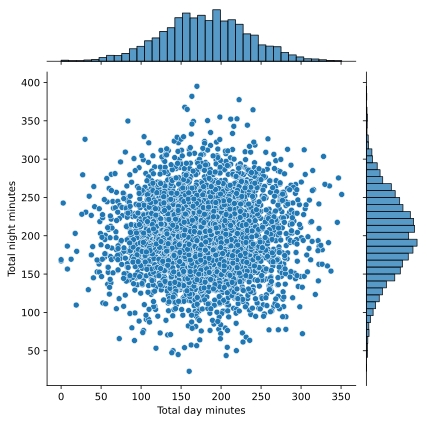

In [32]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter')

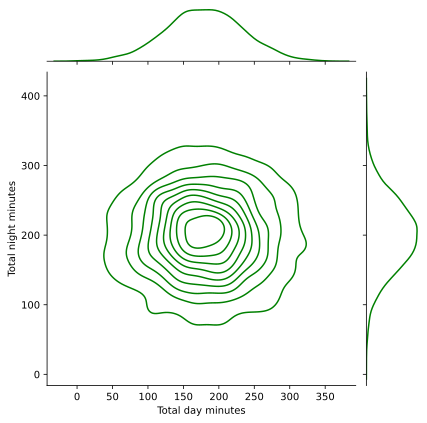

In [34]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='kde', color='g')

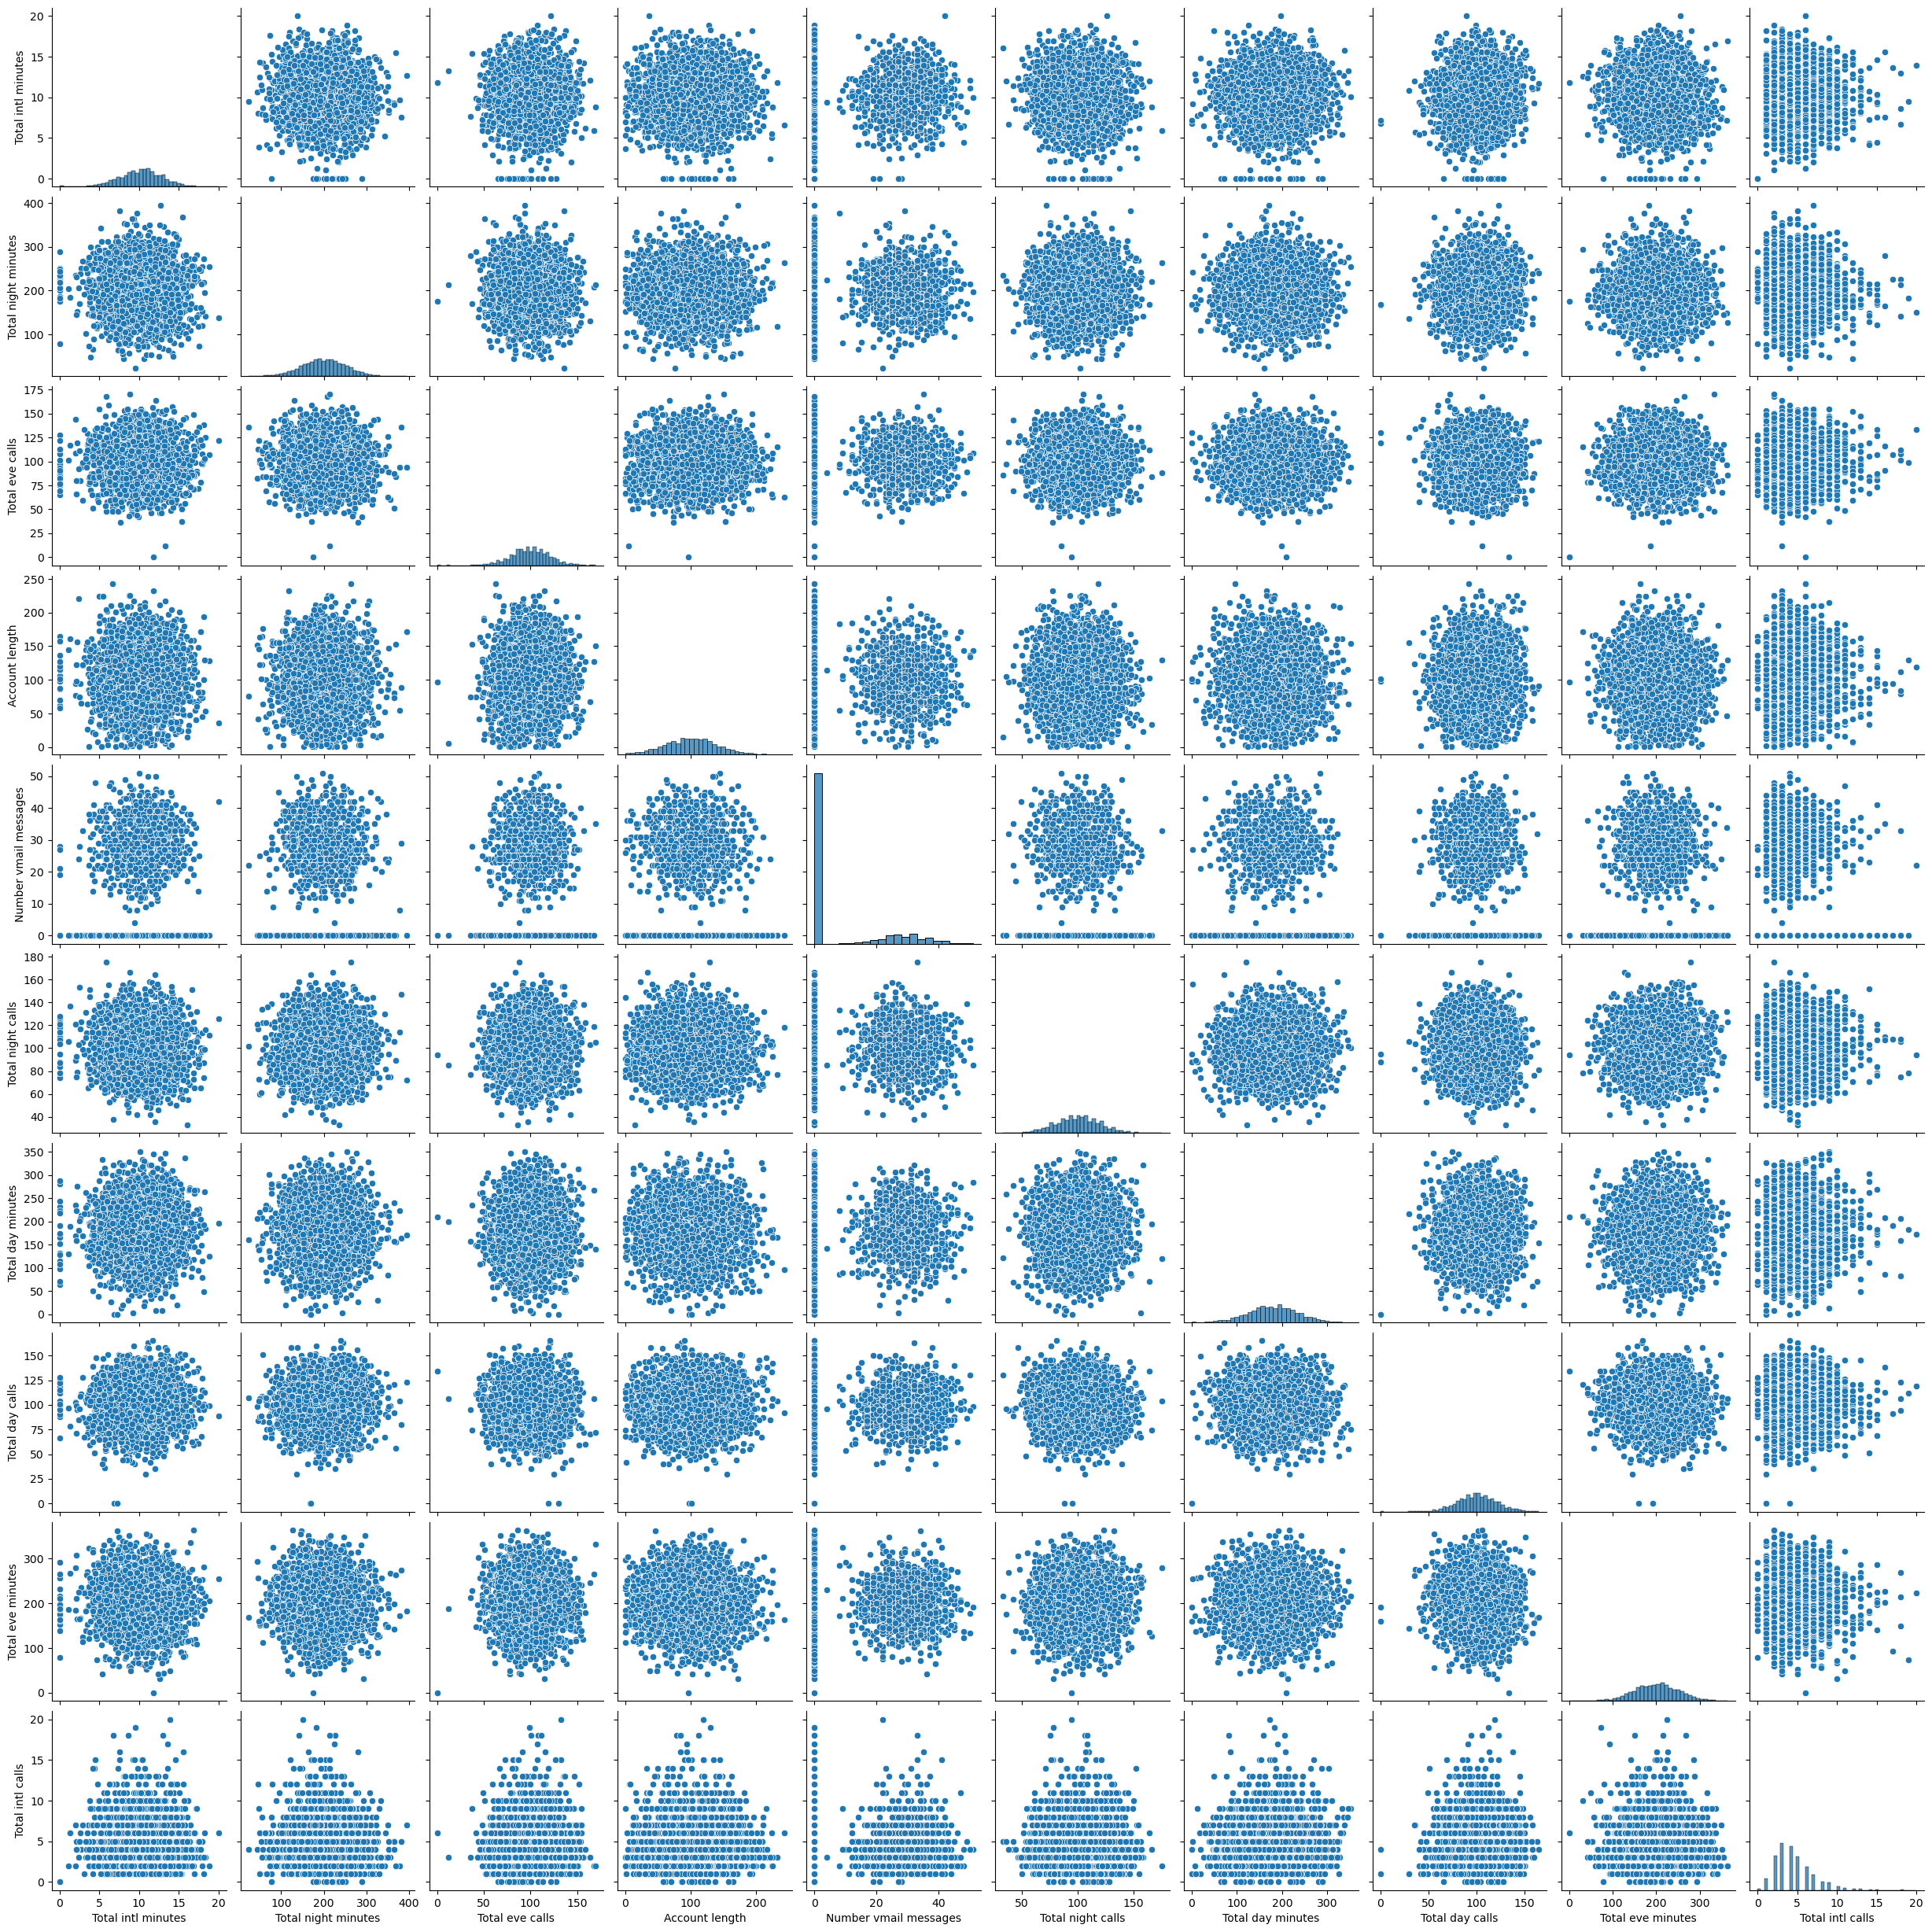

In [38]:
sns.pairplot(df[numerical]);

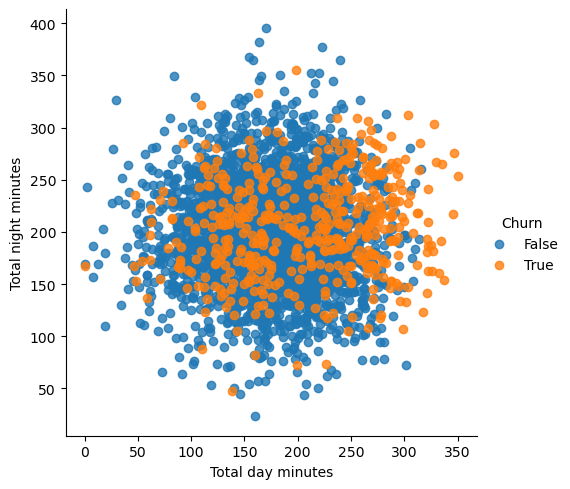

In [39]:
sns.lmplot(x='Total day minutes', y='Total night minutes', data=df, hue='Churn', fit_reg=False)

In [50]:
numerical.append('Customer service calls')

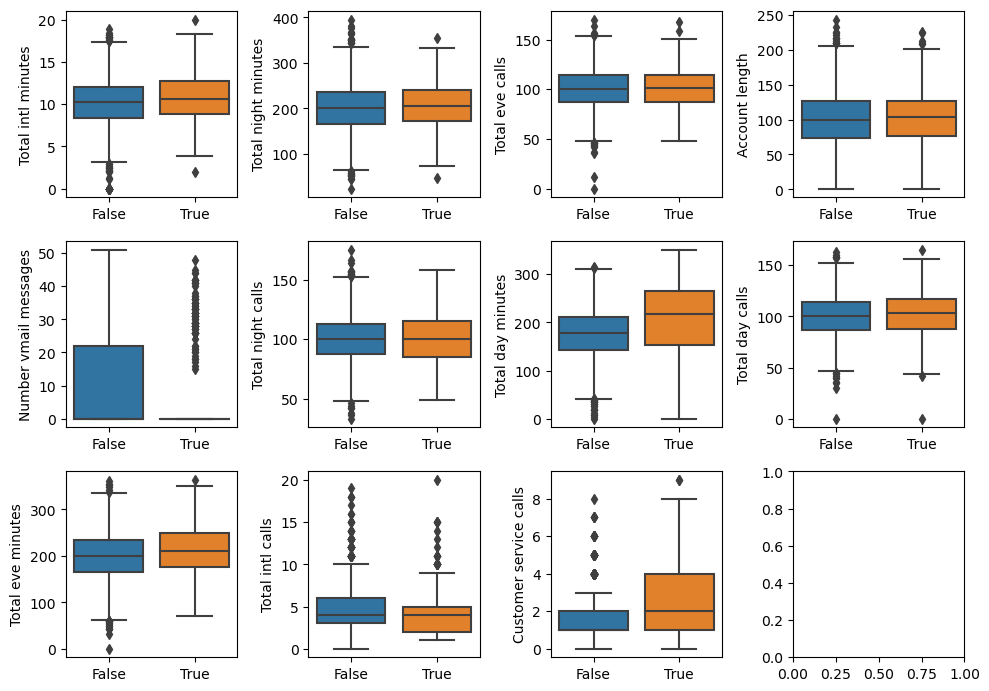

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

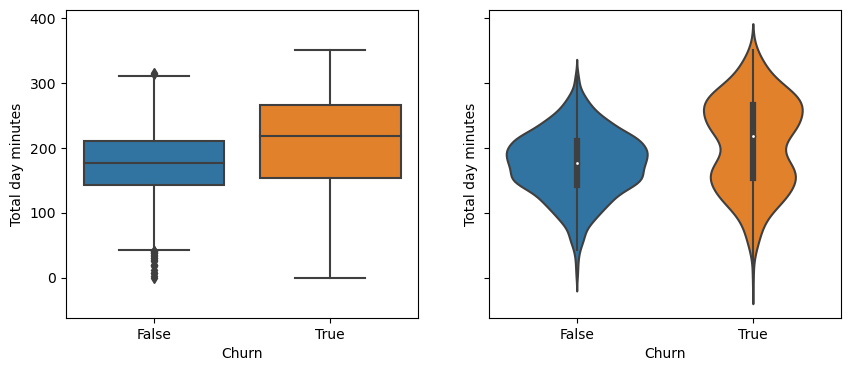

In [52]:
_, axes = plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

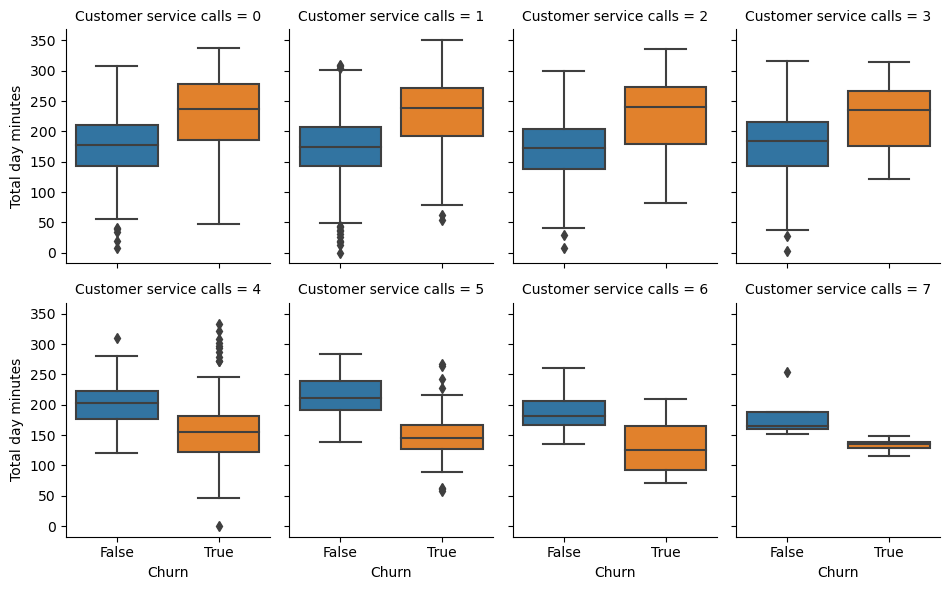

In [53]:
sns.catplot(
    x='Churn',
    y='Total day minutes',
    col='Customer service calls',
    data=df[df['Customer service calls'] < 8],
    kind='box',
    col_wrap=4,
    height=3,
    aspect=0.8
)

<Axes: xlabel='Customer service calls', ylabel='count'>

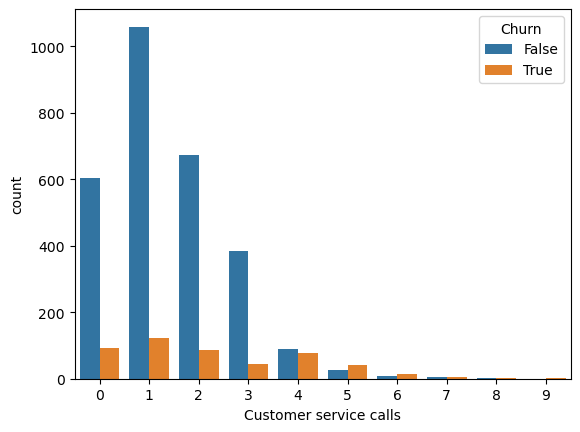

In [54]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

In [55]:
pd.crosstab(df.State, df.Churn).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [58]:
df.groupby('State').Churn.agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [91]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [93]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

<Axes: xlabel='Year_of_Release'>

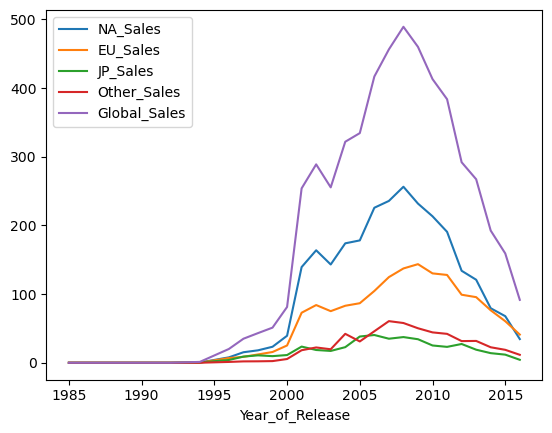

In [96]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

<Axes: xlabel='Year_of_Release'>

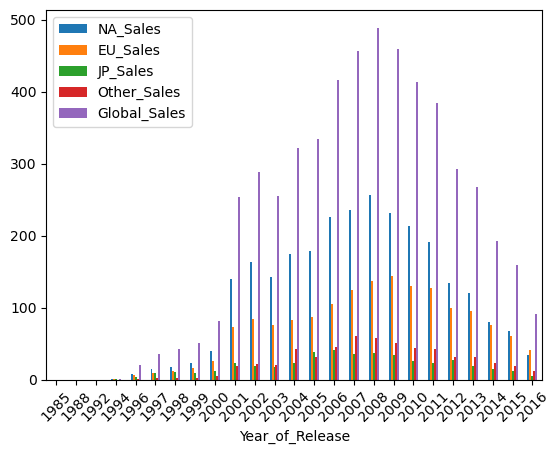

In [97]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

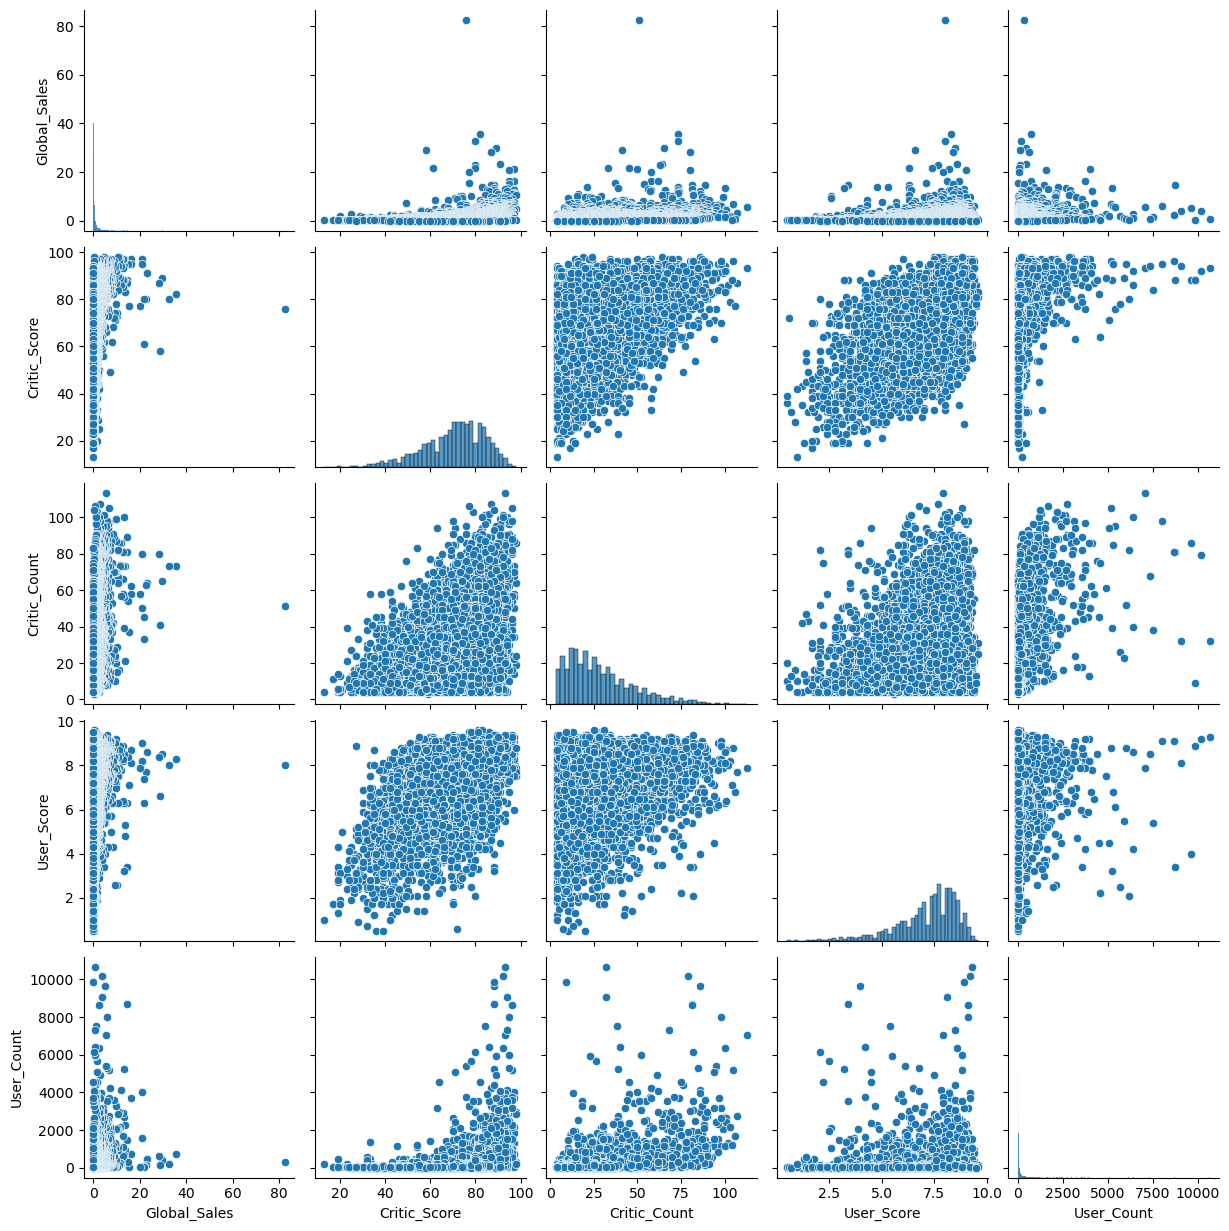

In [98]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']])

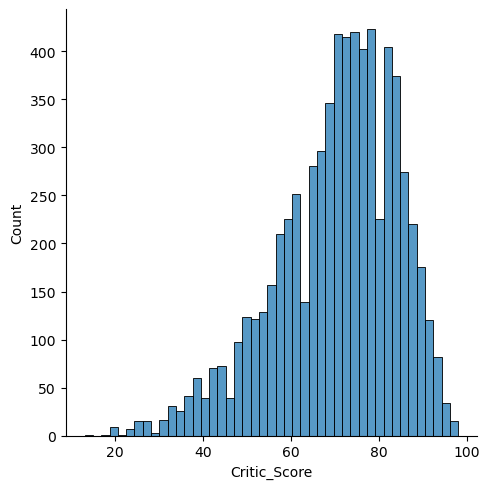

In [100]:
sns.displot(df.Critic_Score)

In [104]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [106]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
df_uniques

variable  value
0        gender      2
1        gender      1
2        gender      1
3        gender      2
4        gender      1
...         ...    ...
489995   cardio      0
489996   cardio      1
489997   cardio      1
489998   cardio      1
489999   cardio      0

[490000 rows x 2 columns]

In [108]:
df_uniques = (
    pd.DataFrame(df_uniques.groupby(['variable', 'value']).value.count())
    .sort_index(level=[0,1])
    .rename(columns={'value': 'count'})
    .reset_index()
)
df_uniques

variable  value  count
0        active      0  13739
1        active      1  56261
2          alco      0  66236
3          alco      1   3764
4        cardio      0  35021
5        cardio      1  34979
6   cholesterol      1  52385
7   cholesterol      2   9549
8   cholesterol      3   8066
9        gender      1  45530
10       gender      2  24470
11         gluc      1  59479
12         gluc      2   5190
13         gluc      3   5331
14        smoke      0  63831
15        smoke      1   6169

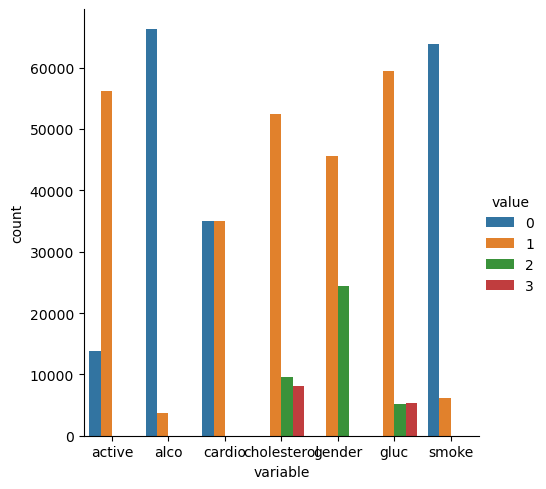

In [109]:
sns.catplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar')

In [111]:
df.groupby('gender').height.mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [113]:
df.groupby('gender').alco.mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [114]:
df.groupby('gender').smoke.mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [115]:
round(100 * (0.218 - 0.017))

20

In [117]:
df.groupby('smoke').age.median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [118]:
df['age_years'] = (df.age / 365.25).round().astype('int')
df.age_years.max()

65

In [120]:
smoking_old_men = df[
    (df.gender == 2)
    & (df.age_years >= 60)
    & (df.age_years < 65)
    & (df.smoke == 1)
]
smoking_old_men.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
19    29  21755       2     162    56.0    120     70            1     1   
38    52  23388       2     162    72.0    130     80            1     1   
67    90  22099       2     171    97.0    150    100            3     1   
177  240  21848       2     170    69.0    120     80            1     1   
182  248  22671       2     174    74.0    130     80            3     1   

     smoke  alco  active  cardio  age_years  
19       1     0       1       0         60  
38       1     0       1       1         64  
67       1     0       1       1         61  
177      1     1       1       0         60  
182      1     0       1       1         62

In [121]:
smoking_old_men[(smoking_old_men.cholesterol == 1) & (smoking_old_men.ap_hi < 120)].cardio.mean()

0.2631578947368421

In [122]:
smoking_old_men[(smoking_old_men.cholesterol == 3) & (smoking_old_men.ap_hi >= 160)].cardio.mean()

0.9

In [123]:
df['BMI'] = df.weight / (df.height / 100) ** 2
df.BMI.median()

26.374068120774975

In [124]:
df.groupby('gender').BMI.median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [126]:
df.groupby(['gender', 'alco', 'cardio']).BMI.median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [130]:
to_remove = df[
    (df.ap_lo > df.ap_hi)
    | (df.height < df.height.quantile(0.025))
    | (df.height > df.height.quantile(0.975))
    | (df.weight < df.weight.quantile(0.025))
    | (df.weight > df.weight.quantile(0.975))
]
to_remove.shape[0] / df.shape[0]

0.0963

In [132]:
df = df[~df.index.isin(to_remove)]

<Axes: >

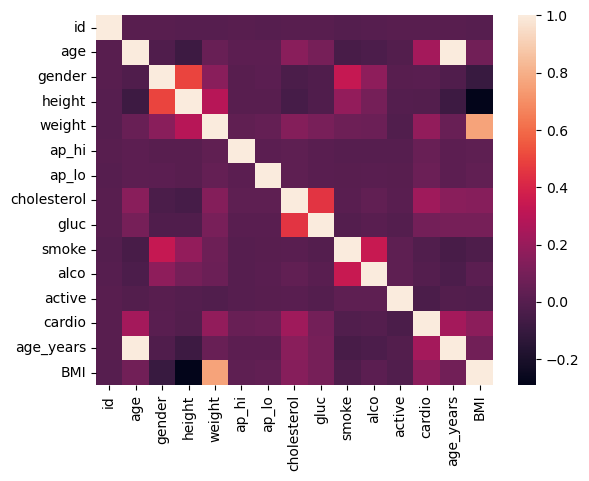

In [134]:
corr = df.corr()
sns.heatmap(corr)

<Axes: >

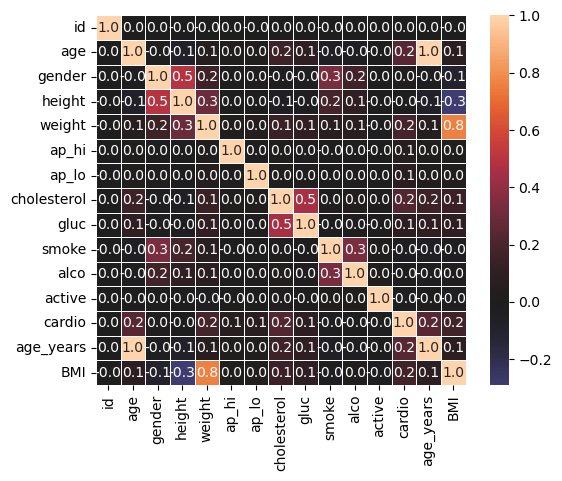

In [145]:
sns.heatmap(
    corr,
    vmax=1,
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
    linewidths=0.5,
)

   gender variable  value
0       2   height    168
1       1   height    156
2       1   height    165
3       2   height    169
4       1   height    156


<Axes: xlabel='variable', ylabel='value'>

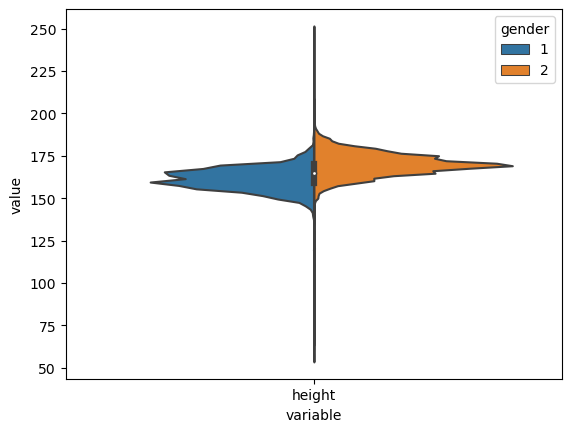

In [152]:
df_melt = df.melt(id_vars=['gender'], value_vars=['height'])
print(df_melt.head())

sns.violinplot(
    x='variable',
    y='value',
    hue='gender',
    split=True,
    data=df_melt,
)

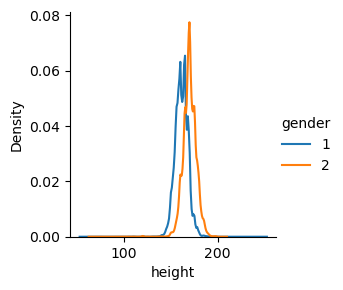

In [156]:
sns.FacetGrid(df, hue='gender').map(sns.kdeplot, 'height').add_legend()

<Axes: >

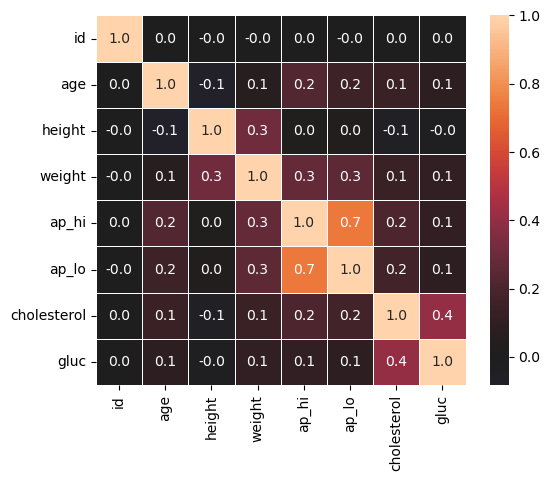

In [158]:
corr = df[['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].corr(method='spearman')
sns.heatmap(
    corr,
    vmax=1,
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
    linewidths=0.5,
)

<Axes: xlabel='age_years', ylabel='count'>

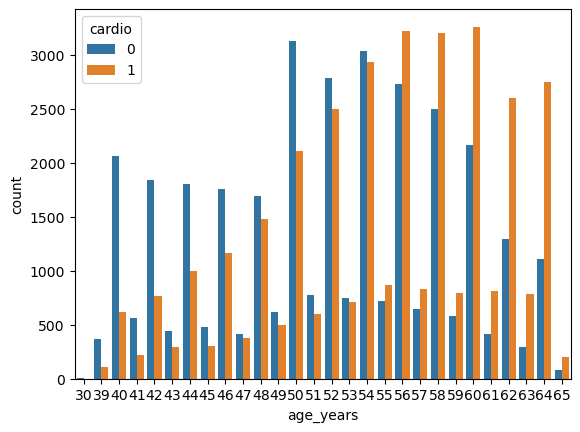

In [159]:
sns.countplot(data=df, x='age_years', hue='cardio')